This notebook is part of [**Byron v0.8**](https://pypi.org/project/byron/)  
Copyright 2023-24 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://opensource.org/license/apache-2-0/)  

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_4216/1429530752.py:1: ByronPerformanceWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/cad-polito-it/byron/blob/alpha/docs/paranoia.md for details]
  import byron


In [2]:
import networkx as nx

In [3]:
cnt = byron.f.counter_parameter()
foo = byron.f.macro('foo {c}', c=cnt)
bar = byron.f.macro('bar {c}', c=cnt)
decl = byron.f.macro('', _label='PROC {_node}:\n')
proc = byron.f.sequence([decl, byron.f.bunch([bar], size=3)])
call = byron.f.macro('call {proc}', proc=byron.f.global_reference(proc, first_macro=True, creative_zeal=1))
main = byron.f.bunch([foo, call], size=5)

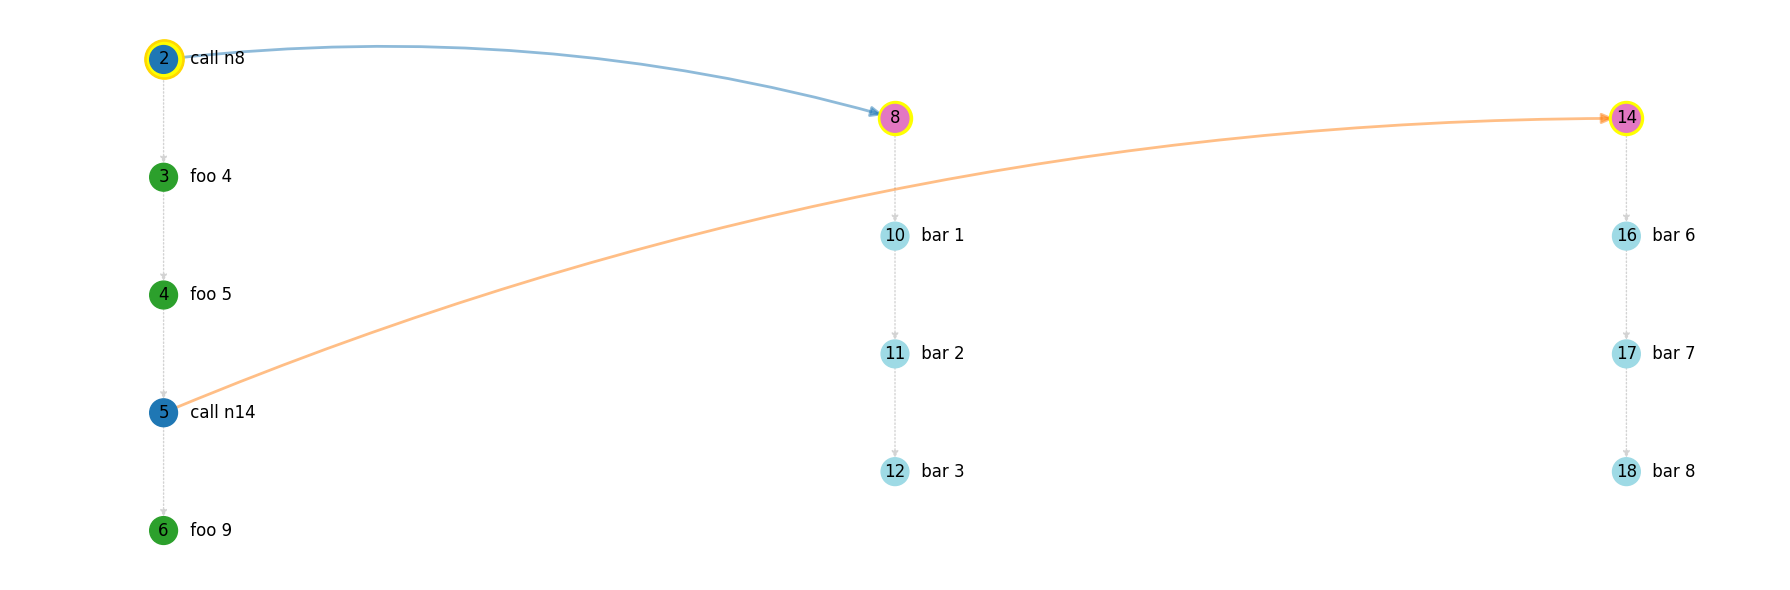

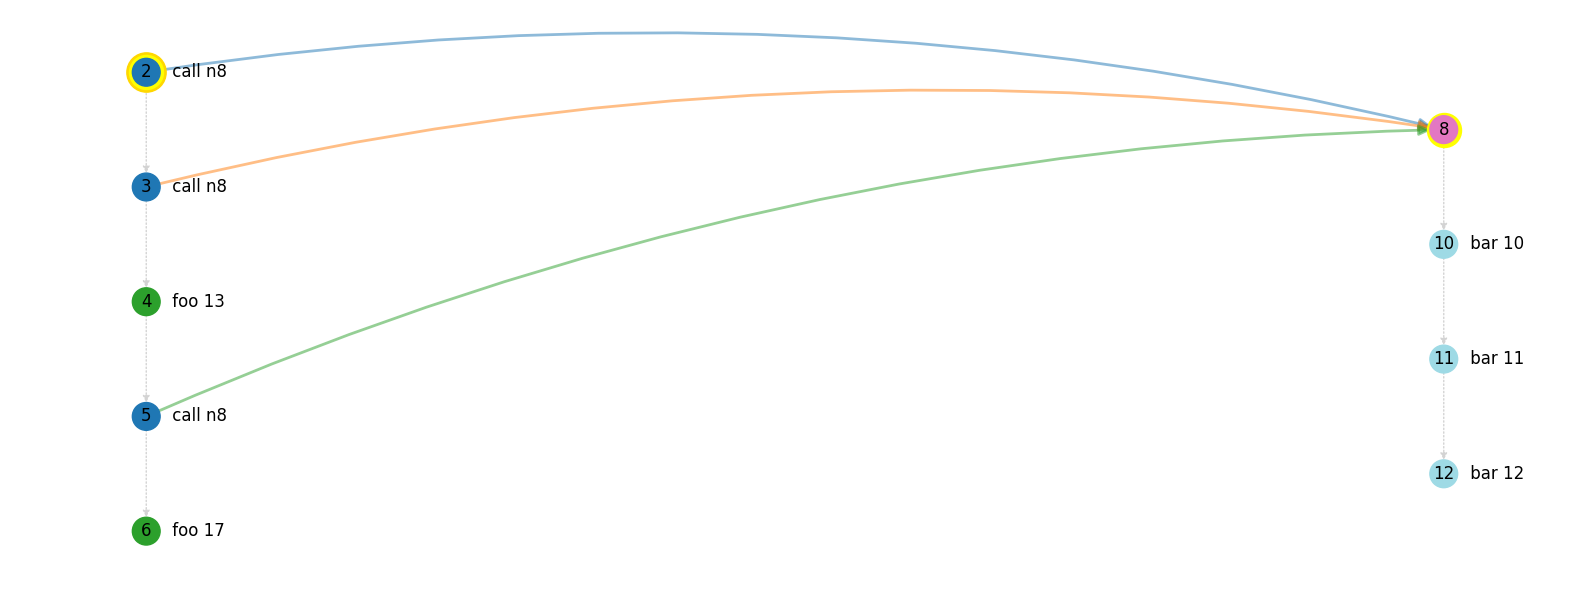

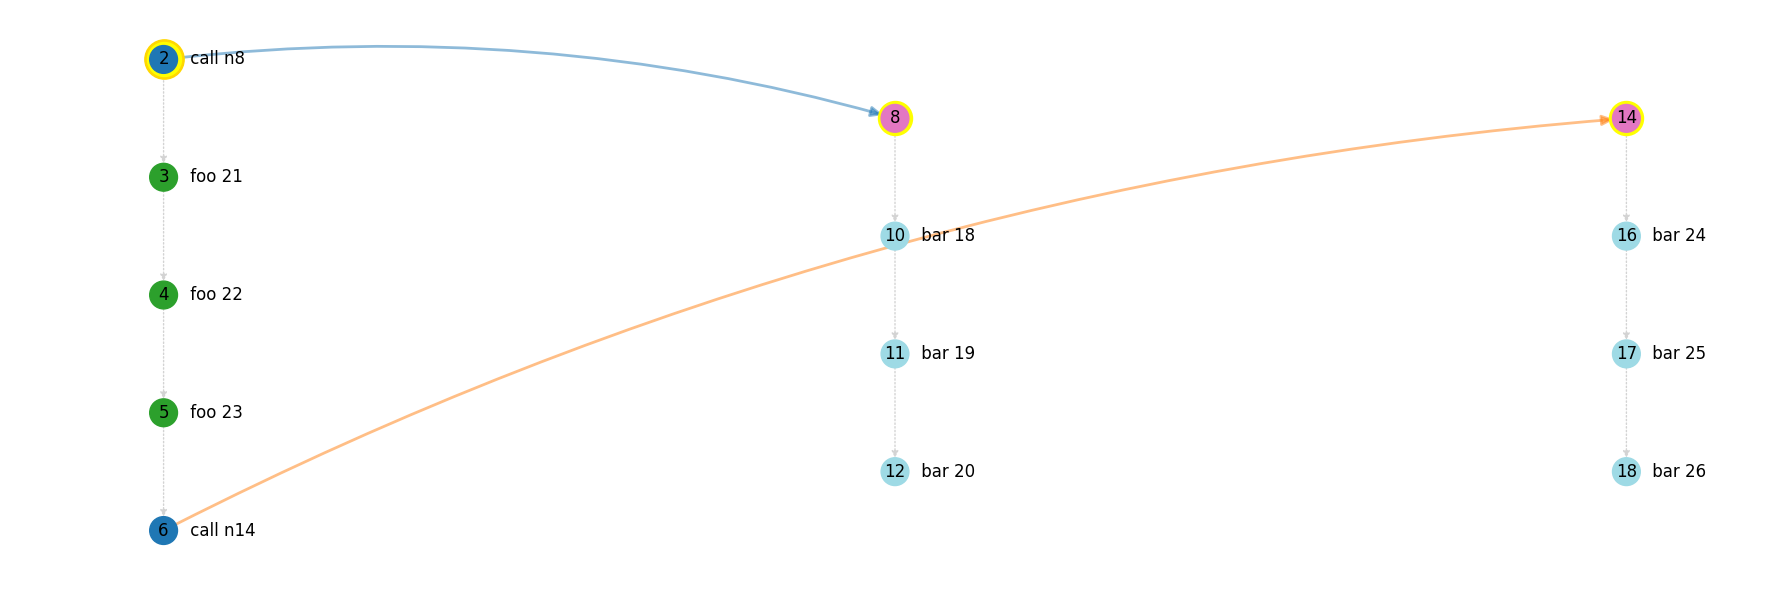

In [4]:
i1 = byron.op.random_individual(main)[0]
i2 = byron.op.random_individual(main)[0]
i3 = byron.op.random_individual(main)[0]
i1.as_lgp()
i2.as_lgp()
i3.as_lgp()

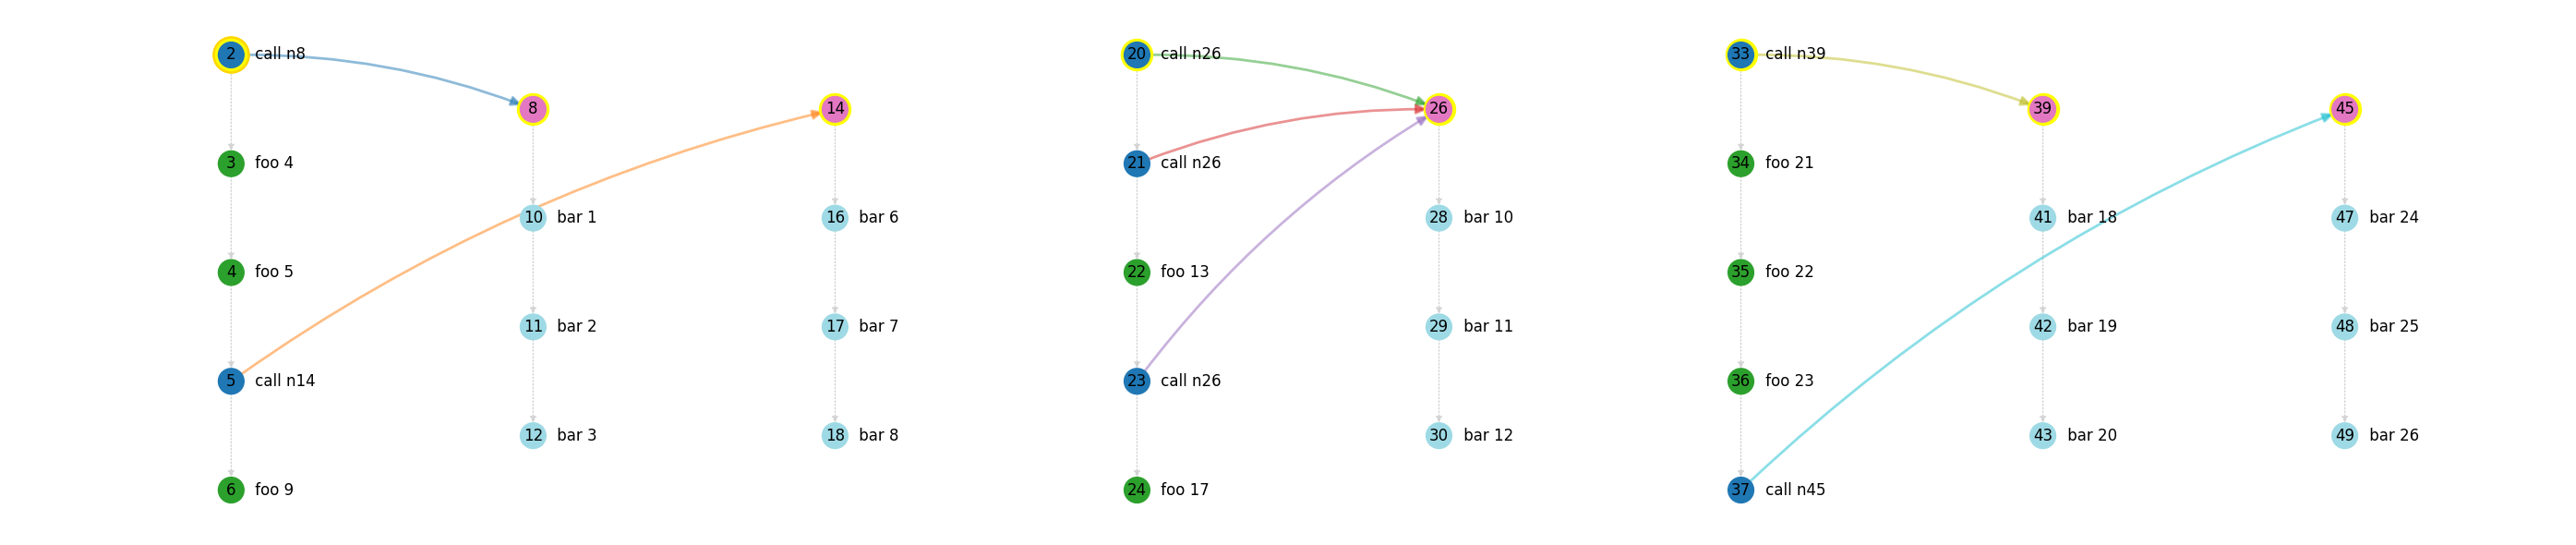

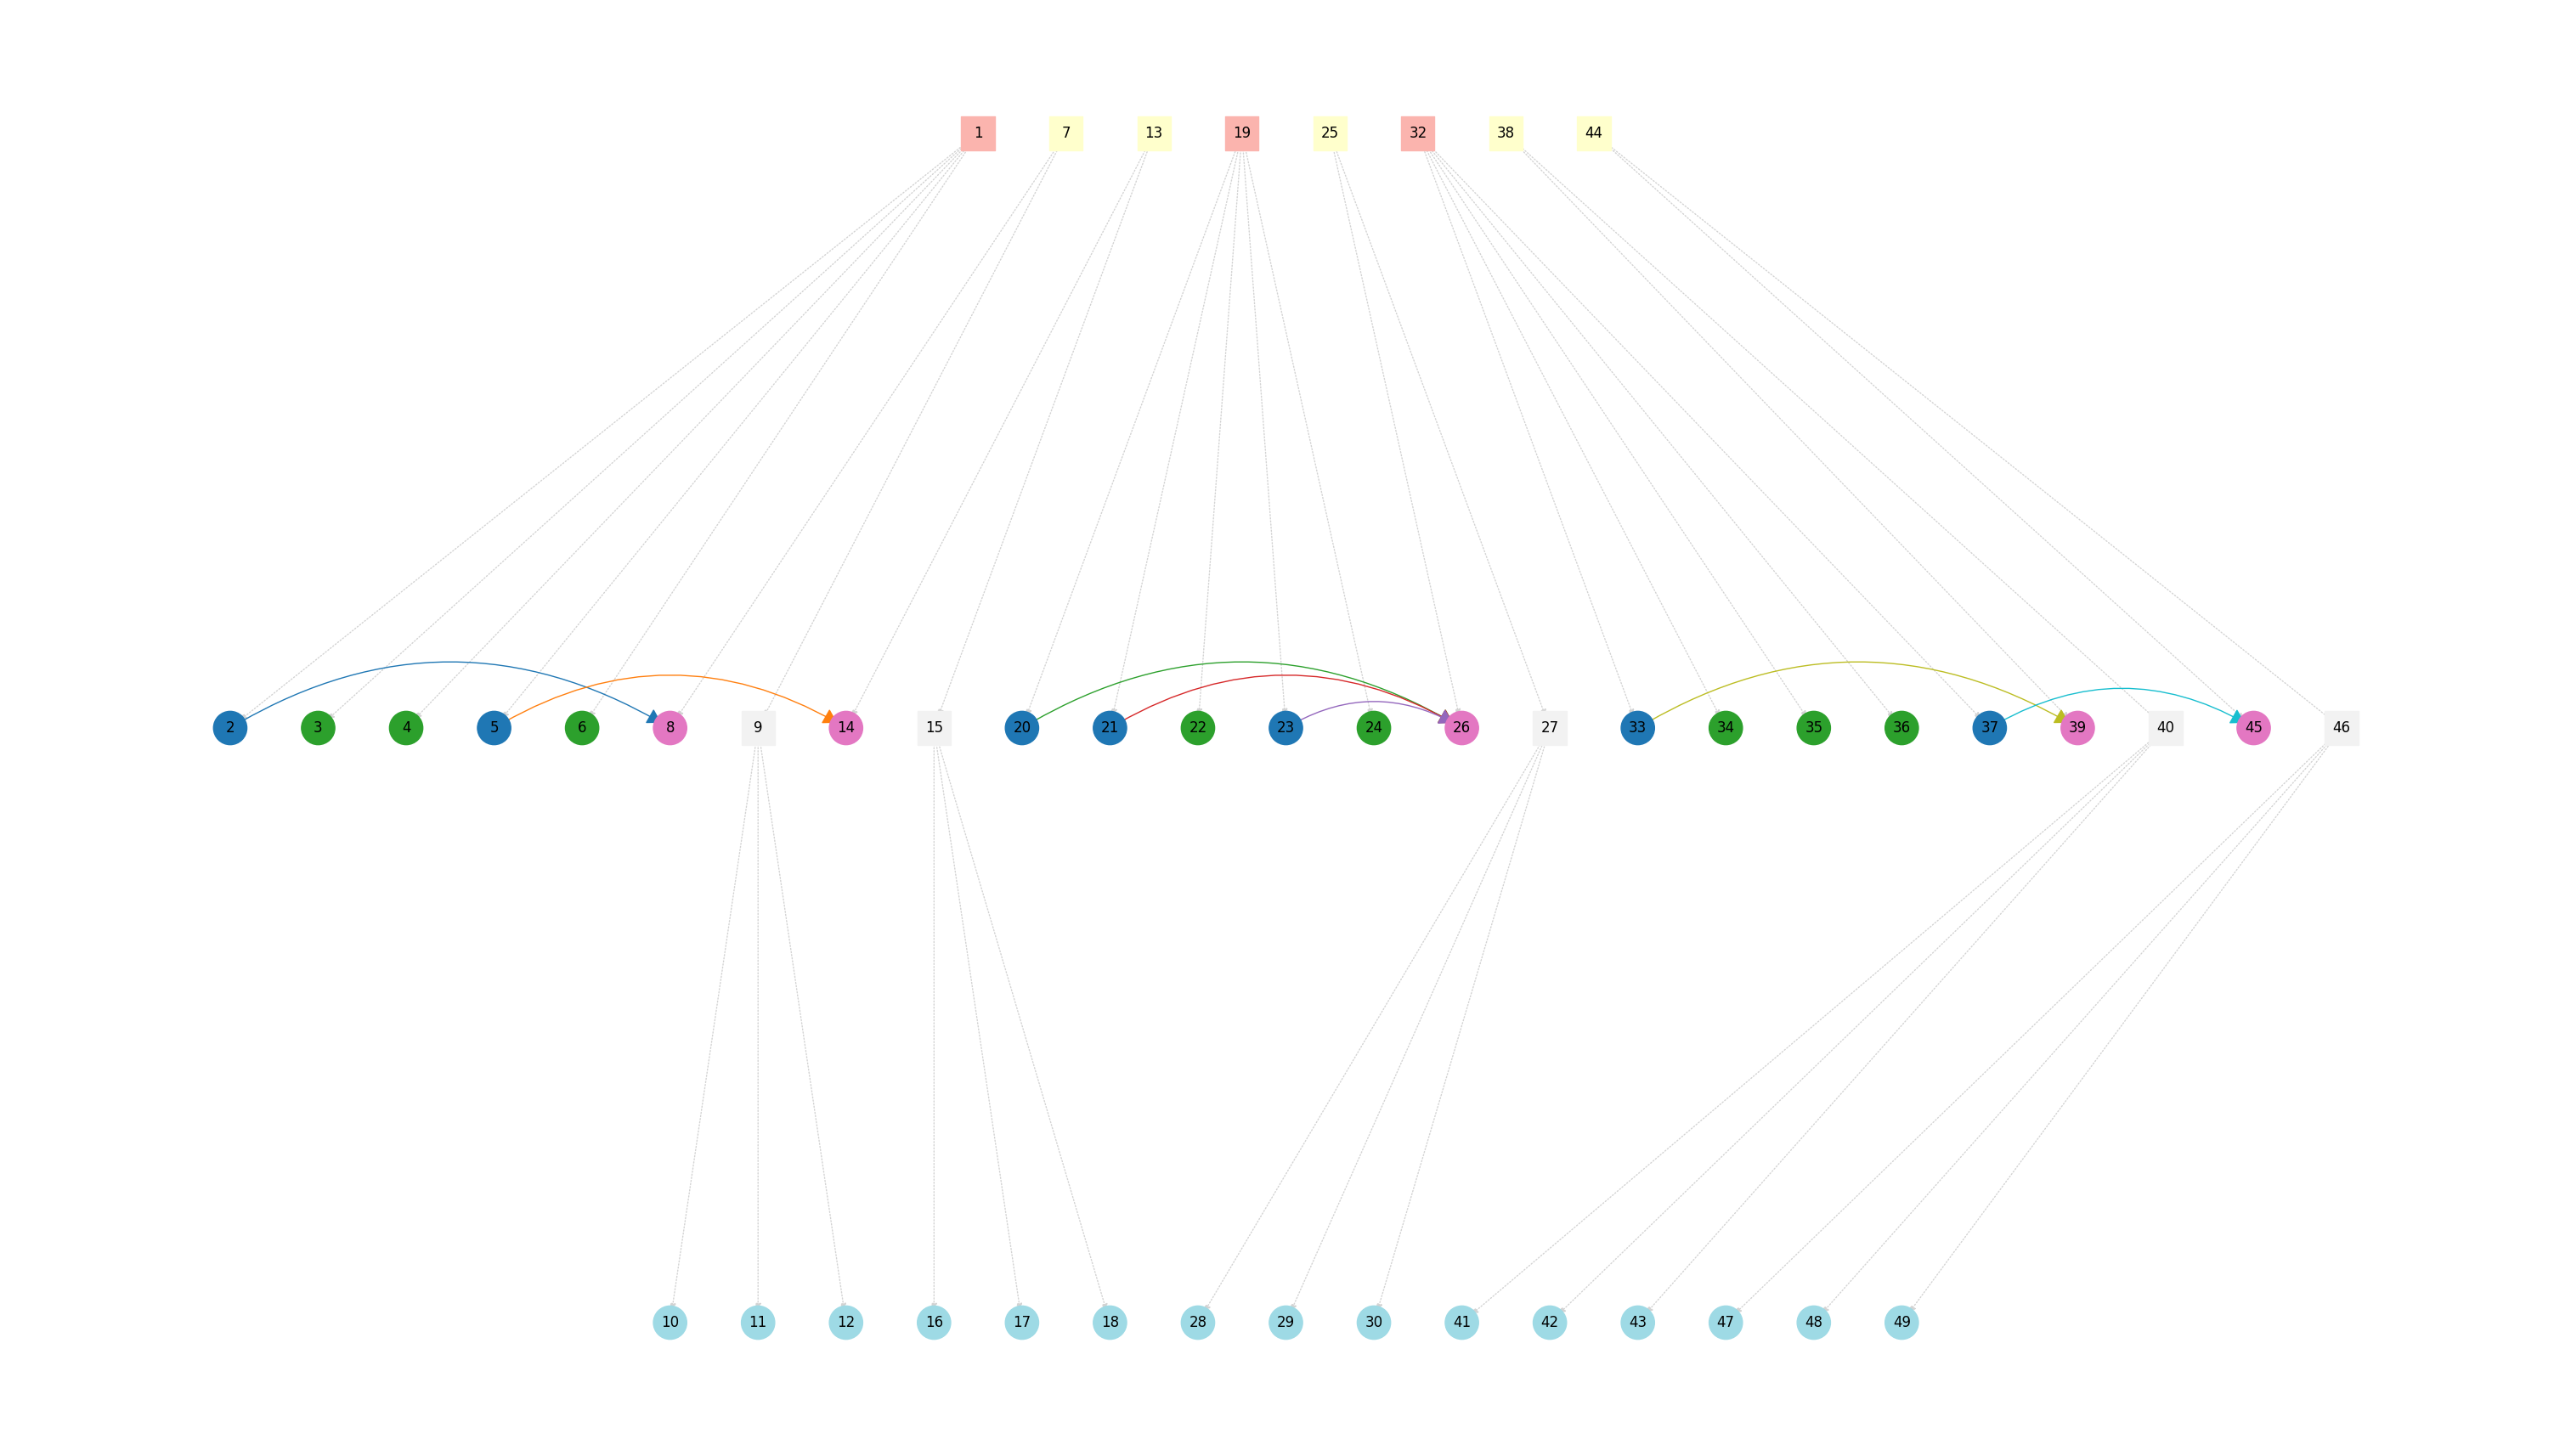

In [5]:
ind = byron.operators.merge_individuals([i1, i2, i3])
ind.as_lgp()
ind.as_forest()

In [11]:
x = byron.operators.group_parameters_on_classpath([i1, i2])
x

{(byron.framework.Macro❬MacroZero❭,
  byron.framework.Frame❬MacroArray#2❭,
  byron.framework.Macro❬User#3❭): {<byron.classes.individual.Individual at 0x136b0be50>: [<byron.parameter.GlobalReference[Frame❬FrameSequence#1❭] at 0x136b28b90>,
   <byron.parameter.GlobalReference[Frame❬FrameSequence#1❭] at 0x136b29590>],
  <byron.classes.individual.Individual at 0x103784a90>: [<byron.parameter.GlobalReference[Frame❬FrameSequence#1❭] at 0x136b35450>,
   <byron.parameter.GlobalReference[Frame❬FrameSequence#1❭] at 0x136b35890>,
   <byron.parameter.GlobalReference[Frame❬FrameSequence#1❭] at 0x136b34d90>]},
 (byron.framework.Macro❬MacroZero❭,
  byron.framework.Frame❬MacroArray#2❭,
  byron.framework.Macro❬User#1❭): {<byron.classes.individual.Individual at 0x136b0be50>: [<byron.parameter.Counter[] at 0x136b29210>,
   <byron.parameter.Counter[] at 0x136b293d0>,
   <byron.parameter.Counter[] at 0x136b29750>],
  <byron.classes.individual.Individual at 0x103784a90>: [<byron.parameter.Counter[] at 0x136